# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [22]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [23]:
train, test = keras.datasets.cifar10.load_data()

In [24]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [25]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [26]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [27]:
def plot_function(results):
    color_bar = ["r", "g", "b", "y", "m", "k"]

#     plt.figure(figsize=(8,6))
#     for i, cond in enumerate(results.keys()):
#         plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
#         plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
#     plt.title("Loss")
#     plt.legend()
#     plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [28]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 1e-3 #[1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9
EPSILON = 1e-8
opt1 = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True,decay = 0.0)
opt2 = keras.optimizers.Adagrad(lr=LEARNING_RATE, epsilon=EPSILON, decay=0.0)
opt3 = keras.optimizers.RMSprop(lr=LEARNING_RATE, epsilon=EPSILON, decay=0.0)
opt4 = keras.optimizers.Adam(lr=LEARNING_RATE, epsilon=EPSILON, decay=0.0)


Parameters:
LearningRate= 0.001
Parameters:
LearningRate= 0.001
Parameters:
LearningRate= 0.001
Parameters:
LearningRate= 0.001


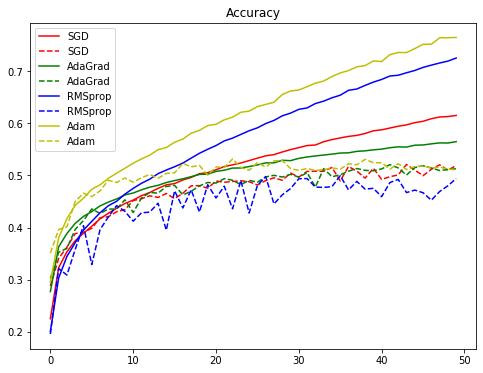

In [29]:
opts={'SGD':opt1,'AdaGrad':opt2,'RMSprop':opt3,'Adam':opt4}
results = {}
for opt_name, opt in opts.items():
    keras.backend.clear_session() # 把舊的 Graph 清掉 #The new one can start at Dense, not Dense2
    model = build_mlp(input_shape=x_train.shape[1:])
    #model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

    model.fit(x_train, y_train, 
                epochs=EPOCHS, 
                batch_size=BATCH_SIZE, 
                validation_data=(x_test, y_test), 
                shuffle=True,
                verbose=0)
    
    # Collect results
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
        
    # Record 此次 model 的結果 in dictionary
    results[opt_name] = {'train-acc': train_acc,'valid-acc': valid_acc}
    print("Parameters:\nLearningRate=",LEARNING_RATE)
plot_function(results) 
